In [35]:
from scipy.io import loadmat
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
%matplotlib inline 

In [2]:
# Replace 'path_to_file' with the path to your PlanetLab file

data1=loadmat('./data_matrix.mat')
data2=loadmat('./new_data_matrix.mat')

In [3]:
fit_data=data2['FIT_17']
ripe_data=data2['RIPE_ATLAS']
pl_data=data1['Toread']

In [4]:
nodes = [i for i in range(305)]

In [5]:
len(pl_data)

335

## Calculate Basic TIV

In [6]:
triangles_pl = list(combinations(range(len(pl_data)), 3))
triangles_ripe = list(combinations(range(len(ripe_data)), 3))
triangles_fit = list(combinations(range(len(fit_data)), 3))

In [7]:
def calculate_tiv_basic(data, triangles):
    total_count = 0
    violation_count = 0
    for t in triangles:
        #Measure the paths in one direction
        if float(data[(t[1],t[2])])/(float(data[(t[1],t[0])]) + float(data[(t[0], t[2])])) > 1:
            violation_count+=1
        total_count+=1
        if float(data[(t[0],t[2])])/(float(data[(t[0],t[1])]) + float(data[(t[1],t[2])])) > 1:
            violation_count+=1
        total_count+=1
        if float(data[(t[0],t[1])])/(float(data[(t[0],t[2])]) + float(data[(t[2],t[1])])) > 1:
            violation_count+=1
        total_count+=1

        #Measure the paths in the opposite direction
        if float(data[(t[2],t[1])])/(float(data[(t[2],t[0])]) + float(data[(t[0], t[1])])) > 1:
            violation_count+=1
        total_count+=1
        if float(data[(t[2],t[0])])/(float(data[(t[2],t[1])]) + float(data[(t[1],t[0])])) > 1:
            violation_count+=1
        total_count+=1
        if float(data[(t[1],t[0])])/(float(data[(t[1],t[2])]) + float(data[(t[2],t[0])])) > 1:
            violation_count+=1
        total_count+=1 
    return violation_count, total_count
    

#### Datasets

In [8]:
tiv_fit, total_fit = calculate_tiv_basic(fit_data, triangles_fit)
tiv_ripe, total_ripe = calculate_tiv_basic(ripe_data, triangles_ripe)
tiv_pl, total_pl = calculate_tiv_basic(pl_data, triangles_pl)

In [9]:
fit_relative_tiv = tiv_fit/total_fit
ripe_relative_tiv = tiv_ripe/total_ripe
pl_relative_tiv = tiv_pl/total_pl

In [10]:
fit_relative_tiv

0.019495581999960133

In [11]:
ripe_relative_tiv

0.09086765827314852

In [12]:
pl_relative_tiv

0.05431702146332587

### TODO: Explain the improvement of Vivaldi and IDES with TIV and SVD

## TIV of Tang and Crovella

In [13]:
pairs_pl = list(combinations(range(len(pl_data)), 2))
pairs_ripe = list(combinations(range(len(ripe_data)), 2))
pairs_fit = list(combinations(range(len(fit_data)), 2))

In [14]:
#len(pairs)

In [15]:
def calculate_tiv_tang_crovella(data, pairs):
    best_alternative_relativ_change = []#np.array([])
    total_count=0
    for p in pairs:
        minimum_ahead = float('inf')
        minimum_back = float('inf')
        min_ahead_index = 0
        min_back_index = 0
        for i in nodes:
            if i in p:
                continue
            #Check the way from node a to b
            if data[p[0], i] + data[i, p[1]] < minimum_ahead:
                minimum_ahead = data[p[0], i] + data[i, p[1]]
                min_ahead_index = i
                
            #Check the way from node b to a
            if data[p[1], i] + data[i, p[0]] < minimum_back:
                minimum_back = data[p[1], i] + data[i, p[0]]
                min_back_index = i
        
        rel_change_ahead = minimum_ahead / data[p[0], p[1]]
        rel_change_back = minimum_back / data[p[1], p[0]]
        
        best_alternative_relativ_change.append(rel_change_ahead)
        best_alternative_relativ_change.append(rel_change_back)
        #sorted_index_ahead = np.searchsorted(best_alternative_relativ_change, rel_change_ahead)
        #np.insert(best_alternative_relativ_change, sorted_index_ahead, rel_change_ahead)
        #sorted_index_back = np.searchsorted(best_alternative_relativ_change, rel_change_back)
        #np.insert(best_alternative_relativ_change, sorted_index_back, rel_change_back)
        total_count += 2
    
    return best_alternative_relativ_change

In [16]:
best_alternative_paths_fit = calculate_tiv_tang_crovella(fit_data, pairs_fit)
best_alternative_paths_ripe = calculate_tiv_tang_crovella(ripe_data, pairs_ripe)
best_alternative_paths_pl = calculate_tiv_tang_crovella(pl_data, pairs_pl)

In [17]:
fit_count, fit_bins = np.histogram(best_alternative_paths_fit, bins=1000, range=(0,2)) 
ripe_count, ripe_bins = np.histogram(best_alternative_paths_ripe, bins=1000, range=(0,2)) 
pl_count, pl_bins = np.histogram(best_alternative_paths_pl, bins=1000,  range=(0,2)) 

PDF and CDF of the relative alternative paths

In [18]:
pdf_fit = fit_count / sum(fit_count)
cdf_fit = np.cumsum(pdf_fit)
pdf_ripe = ripe_count / sum(ripe_count)
cdf_ripe = np.cumsum(pdf_ripe)
pdf_pl = pl_count / sum(pl_count)
cdf_pl = np.cumsum(pdf_pl)


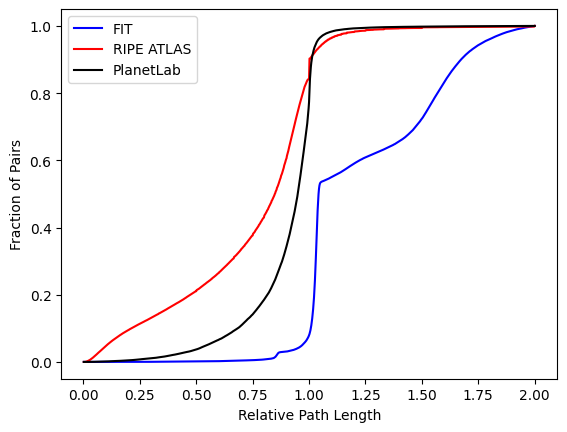

In [32]:
#TODO add a dashed line on 1 in x axis 

plt.plot(fit_bins[1:], cdf_fit, color="blue", label="FIT") 
plt.plot(ripe_bins[1:], cdf_ripe, color="red", label="RIPE ATLAS") 
plt.plot(pl_bins[1:], cdf_pl, color="black", label="PlanetLab") 
plt.ylabel("Fraction of Pairs")
plt.xlabel("Relative Path Length")
plt.legend() 

In [20]:
np.mean(np.array(best_alternative_paths_ripe))

0.7740096438913704

In [21]:
array_fit = np.array(best_alternative_paths_fit)
array_ripe = np.array(best_alternative_paths_ripe)
array_pl = np.array(best_alternative_paths_pl)

In [22]:
npre_fit = np.percentile(array_fit, 99)
npre_fit

2.1457092623215672

In [23]:
npre_ripe = np.percentile(array_ripe, 99)
npre_ripe

1.5

In [24]:
npre_pl = np.percentile(array_pl, 99)
npre_pl

1.2209123948563252

In [39]:
best_alternative_paths = {
    "FIT IoT": array_fit,
    "RIPE Atlas": array_ripe,
    "PlanetLab": array_pl
}

percentiles = [5, 10, 15, 25, 50, 75]
value_dict = {}

for k, v in best_alternative_paths.items():
    values = []
    for pval in percentiles:
        perc = np.percentile(v, pval)
        values.append(perc)
    value_dict[k] = values

df_paths = pd.DataFrame.from_dict(value_dict, columns=percentiles, orient='index').astype(float)
df_paths

,5,10,15,25,50,75
FIT IoT,0.971354,1.008397,1.017594,1.026899,1.043341,1.539246
RIPE Atlas,0.104248,0.214286,0.352941,0.575683,0.850000,0.952941
PlanetLab,0.548064,0.684163,0.761030,0.853327,0.950184,0.997745


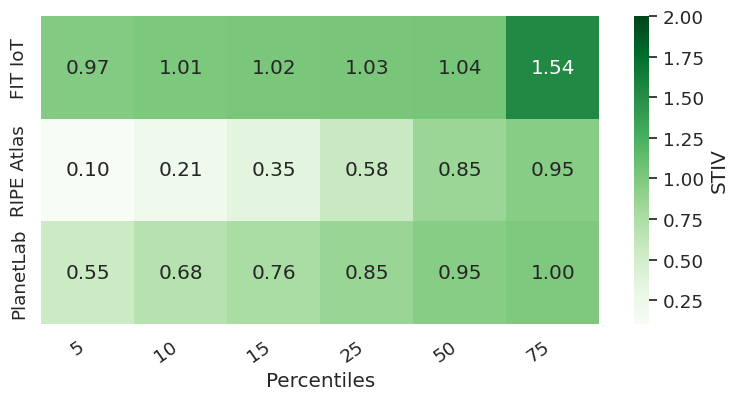

In [40]:
# create the heatmap
fig, ax = plt.subplots(figsize=(9, 4))
sns.set(font_scale=1.2)
sns.heatmap(df_paths, annot=True, cmap='Greens', vmax=2, cbar_kws={'label': 'STIV'}, cbar=True, fmt='.2f', ax=ax)

# Rotate xtick labels
plt.xticks(rotation=35, ha='right')
plt.xlabel("Percentiles")
# show the plot
#plt.savefig("plots/NES/latency_heatmap_perc.svg", bbox_inches='tight')
# plt.title("Latency ({0} ms)".format(waitTime))
plt.show()

In [26]:
rtt_fit_count, rtt_fit_bins = np.histogram(flattened_fit, bins=1000) 
rtt_ripe_count, rtt_ripe_bins = np.histogram(flattened_ripe, bins=1000) 
rtt_pl_count, rtt_pl_bins = np.histogram(flattened_pl, bins=1000) 

In [27]:
rtt_pdf_fit = rtt_fit_count / sum(rtt_fit_count)
rtt_cdf_fit = np.cumsum(rtt_pdf_fit)
rtt_pdf_ripe = ripe_count / sum(rtt_ripe_count)
rtt_cdf_ripe = np.cumsum(rtt_pdf_ripe)
rtt_pdf_pl = rtt_pl_count / sum(rtt_pl_count)
rtt_cdf_pl = np.cumsum(rtt_pdf_pl)


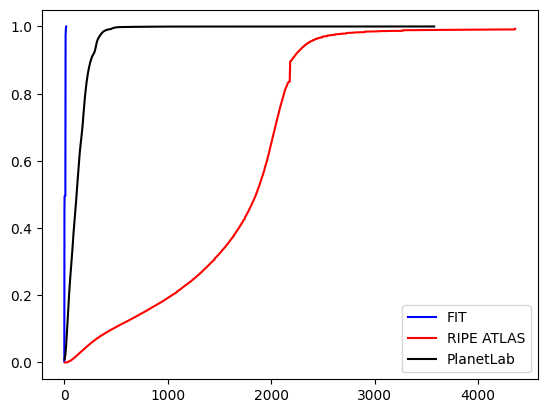

In [28]:
plt.plot(rtt_fit_bins[1:], rtt_cdf_fit, color="blue", label="FIT") 
plt.plot(rtt_ripe_bins[1:], rtt_cdf_ripe, color="red", label="RIPE ATLAS") 
plt.plot(rtt_pl_bins[1:], rtt_cdf_pl, color="black", label="PlanetLab") 
plt.legend() 

In [29]:
npre_rtt_fit = np.percentile(flattened_fit, 99)
npre_rtt_fit

14.583

In [30]:
npre_rtt_ripe = np.percentile(flattened_ripe, 90)
npre_rtt_ripe

259.0

In [31]:
npre_rtt_pl = np.percentile(flattened_pl, 90)
npre_rtt_pl

256.87